<a href="https://colab.research.google.com/github/VokeBrume/ArtificialIntelligence/blob/main/ML/PropertyValuePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### FETCH DATA

In [1]:
# Import needed library and read dataset
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SummerAIClass/kc_house_data.csv")

#### UNDERSTANDING THE DATA

In [2]:
# View first five rows of data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# View data information and count of null/non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### DATA CLEANING

In [4]:
# Drop irrelevant features
houseset = df.drop(["id", "lat", "long", "zipcode", "yr_built", "yr_renovated", "date","waterfront","condition"], axis=1)

In [5]:
houseset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   view           21613 non-null  int64  
 7   grade          21613 non-null  int64  
 8   sqft_above     21613 non-null  int64  
 9   sqft_basement  21613 non-null  int64  
 10  sqft_living15  21613 non-null  int64  
 11  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 2.0 MB


In [6]:
houseset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.234303,7.656873,1788.390691,291.509045,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.766318,1.175459,828.090978,442.575043,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,7.000000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,8.000000,2210.000000,560.000000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


#### DATA VISUALIZATION

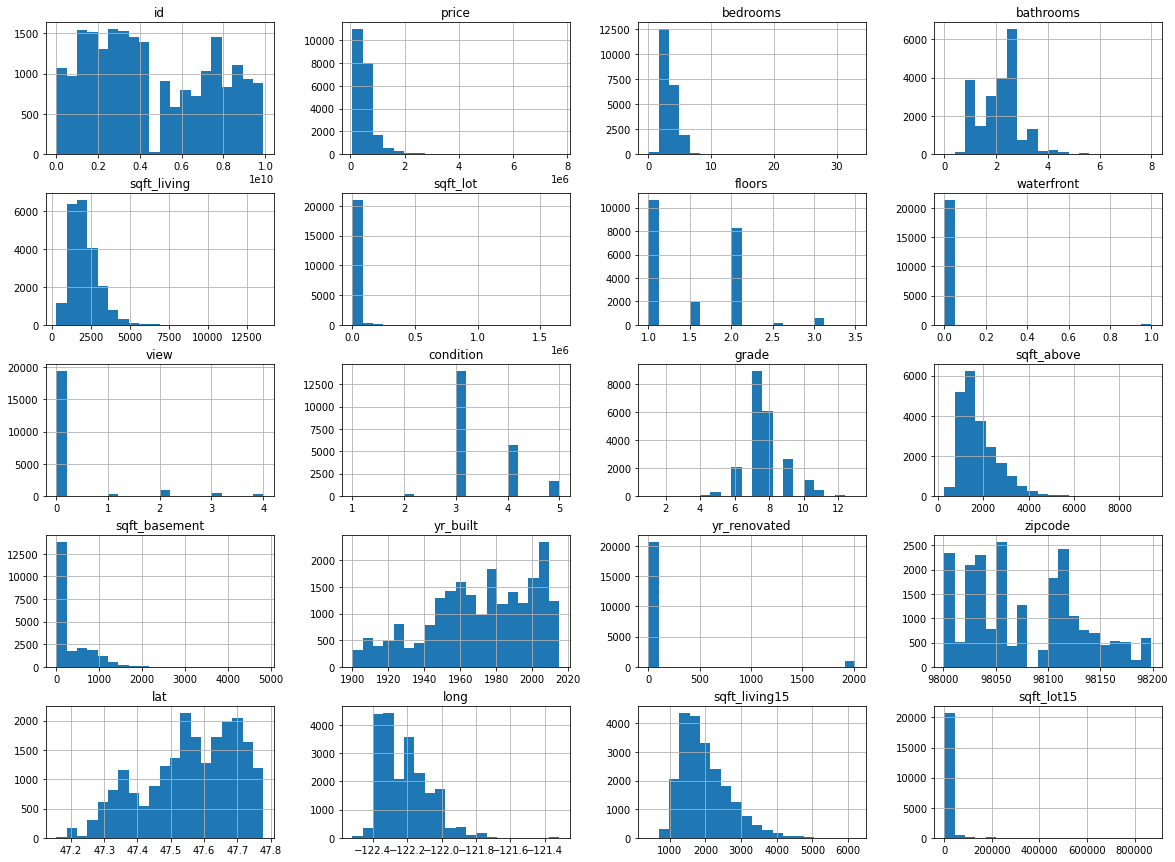

In [7]:
# Visualize the data using matplotib
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(20,15))
plt.show()

#### COMPUTE CORRELATION

In [8]:
# Compute correlation of price against other features
corrs = df.corr()
corrs['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [9]:
corrs

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [10]:
# Drop highly correlated features so only candidate feature set is left
houseset = houseset.drop(["sqft_lot15","sqft_living15","grade"],axis=1)
houseset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   view           21613 non-null  int64  
 7   sqft_above     21613 non-null  int64  
 8   sqft_basement  21613 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


#### DATA SPLIT

In [12]:
# Split dataset to train and test data sets
from sklearn.model_selection import train_test_split
house_train_set, house_test_set = train_test_split(houseset,test_size=0.2,random_state=42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 6325 to 15795
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17290 non-null  float64
 1   bedrooms       17290 non-null  int64  
 2   bathrooms      17290 non-null  float64
 3   sqft_living    17290 non-null  int64  
 4   sqft_lot       17290 non-null  int64  
 5   floors         17290 non-null  float64
 6   view           17290 non-null  int64  
 7   sqft_above     17290 non-null  int64  
 8   sqft_basement  17290 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.3 MB


In [13]:
# Train data set
house_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 6325 to 15795
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17290 non-null  float64
 1   bedrooms       17290 non-null  int64  
 2   bathrooms      17290 non-null  float64
 3   sqft_living    17290 non-null  int64  
 4   sqft_lot       17290 non-null  int64  
 5   floors         17290 non-null  float64
 6   view           17290 non-null  int64  
 7   sqft_above     17290 non-null  int64  
 8   sqft_basement  17290 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.3 MB


In [14]:
# Test data set
house_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 735 to 2522
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4323 non-null   float64
 1   bedrooms       4323 non-null   int64  
 2   bathrooms      4323 non-null   float64
 3   sqft_living    4323 non-null   int64  
 4   sqft_lot       4323 non-null   int64  
 5   floors         4323 non-null   float64
 6   view           4323 non-null   int64  
 7   sqft_above     4323 non-null   int64  
 8   sqft_basement  4323 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 337.7 KB


In [15]:
# Split labels (target variable y) from predictor variables (X)
house_train_X = house_train_set.drop("price", axis=1)
house_train_y = house_train_set["price"].copy()
house_train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 6325 to 15795
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       17290 non-null  int64  
 1   bathrooms      17290 non-null  float64
 2   sqft_living    17290 non-null  int64  
 3   sqft_lot       17290 non-null  int64  
 4   floors         17290 non-null  float64
 5   view           17290 non-null  int64  
 6   sqft_above     17290 non-null  int64  
 7   sqft_basement  17290 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.2 MB


In [16]:
# View data
house_train_y.head()


6325     325000.0
13473    257000.0
17614    228500.0
16970    288000.0
20868    479000.0
Name: price, dtype: float64

#### BUILDING AND TRAINING A MODEL

In [17]:
# Using LinearRegression model because data involves continuous values
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(house_train_X, house_train_y)

LinearRegression()

In [18]:
# Coefficient
lreg.coef_

array([-4.72455481e+04,  9.78945465e+03,  1.86548087e+02, -4.04008742e-01,
        8.64954847e+03,  9.76046630e+04,  9.33706461e+01,  9.31774411e+01])

In [19]:
# Intercept
lreg.intercept_

66005.50774452172

#### PREDICTING HOUSE PRICES

In [20]:
# Performance of model on trained data
import numpy as np
from sklearn.metrics import mean_squared_error
house_predict = lreg.predict(house_train_X)
lreg_mserror = mean_squared_error(house_train_y,house_predict)
lreg_rmserror = np.sqrt(lreg_mserror)
lreg_rmserror
lregscore = lreg.score(house_train_X,house_train_y)
print("lreg_rmserror = ",lreg_rmserror, "Rsq=",lregscore)

lreg_rmserror =  243451.260016702 Rsq= 0.54635174226903


In [21]:
# Seperate label variable from predictors
house_test_X = house_test_set.drop("price", axis=1)
house_test_y = house_test_set["price"].copy()
house_test_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 735 to 2522
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       4323 non-null   int64  
 1   bathrooms      4323 non-null   float64
 2   sqft_living    4323 non-null   int64  
 3   sqft_lot       4323 non-null   int64  
 4   floors         4323 non-null   float64
 5   view           4323 non-null   int64  
 6   sqft_above     4323 non-null   int64  
 7   sqft_basement  4323 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 304.0 KB


In [22]:
# Check model performance on test data
import numpy as np
from sklearn.metrics import mean_squared_error
house_predict_test = lreg.predict(house_test_X)
lreg_mserror_test = mean_squared_error(house_test_y,house_predict_test)
lreg_rmserror_test = np.sqrt(lreg_mserror_test)
lreg_rmserror_test
lregscore_test = lreg.score(house_test_X,house_test_y)
print("lreg_rmserror_test = ",lreg_rmserror_test, "Rsq_test=",lregscore_test)

lreg_rmserror_test =  261144.88351461757 Rsq_test= 0.5488944747654404
